# Chapter 4: Your First Artificial Neural Networks

In Chapter 4, we focused on how to construct basic artificial intelligence applications,  starting with constructing a basic feed forward network with TensorFlow. Artificial neural networks allow us to define complex non-linear problems, and as we take a dive into the mechanics of true deep learning, you'll begin to see how powerful AI applications can be with deep learning at the core. 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import math
import tensorflow as tf
import os

## I. Activation Functions

Defining a sigmoid function from scratch:

In [18]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

Graph the sigmoid that we just created:

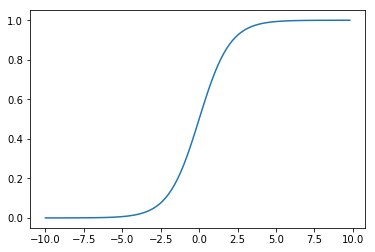

In [19]:
x = np.arange(-10., 10., 0.2)
f = sigmoid(x)
plt.plot(x,f)
plt.show()

Defining a tanh function: 

In [20]:
tanh = np.tanh(np.arange(-5, 5, .1))

Graph the tanh function

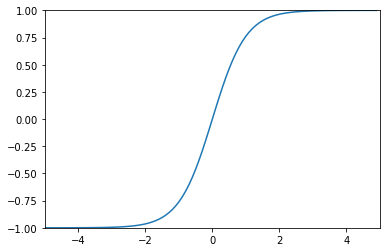

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(-5, 5, .1), tanh)
ax.set_ylim([-1.0, 1.0])
ax.set_xlim([-5,5])
plt.show()

## II. Weights and Bias Factors

Two key parts of ANNs are weights and biases. These elements help us squash and stretch our nonlinearities to help us better approximate a function

Weights change the "steepness" of a function:

In [22]:
def single_output(x, w):
        return np.tanh(np.dot(x, w))

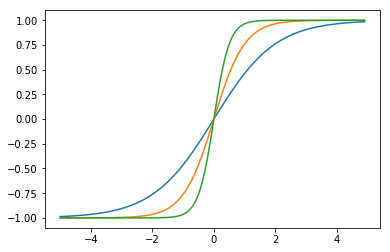

In [23]:
x = np.arange(-5, 5, .1)
f1 = single_output(x, 0.5)
f2 = single_output(x, 1.0)
f3 = single_output(x, 2.0)
plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)
plt.show()

Bias factors "shift" a function: 

In [24]:
def single_output(x, w, b):
        return np.tanh(np.dot(x, w) + b)

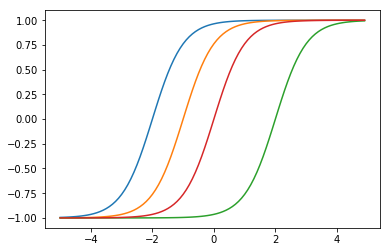

In [25]:
x = np.arange(-5, 5, .1)
f1 = single_output(x, 1.0, 2.0)
f2 = single_output(x, 1.0, 1.0)
f3 = single_output(x, 1.0, -2.0)
f4 = single_output(x, 1.0, 0.0)
plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)
plt.plot(x,f4)
plt.show()

## III. Defining Activation Functions from Scratch

TensorFlow does not have PreLu, but we can define it from scratch. This example is adapted from Francois Chollet's version in the Keras library.

In [27]:
## Parametric ReLu
def PreLu(x):
    alpha = tf.get_variable('alpha',x.get_shape()[-1], initializer=tf.constant_initializer(0.0), dtype=tf.float32)
    p_bound = tf.nn.relu(x)
    n_bound = alpha * (x - abs(x)) * 0.5
    return p_bound + n_bound

When utilizing maxout, TensorFlow has defined layers for us that we can import

In [ ]:
tf.contrib.layers.maxout(
    inputs,
    num_units,
    axis=-1,
    scope=None
)

## IV. Defining Loss Functions

We can define cross-entropy loss from scratch:

In [28]:
def CrossEntropy(yHat, y):
    if yHat == 1:
        return -log(y)
    else:
        return -log(1 - y)

Or, we can use the pre-defined TensorFlow version

In [ ]:
tf.nn.softmax_cross_entropy_with_logits(
    _sentinel=None,
    labels=None,
    logits=None,
    dim=-1,
    name=None
)

Running a linear regression in Tensorflow

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = pd.read_csv('/users/patricksmith/desktop/housing-data.csv')
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


Since the data is in different units of measurement, we need to scale it

In [30]:
data = StandardScaler().fit_transform(data)

Define the features and labels; We'll regress square footage against price

In [31]:
features = data[:,0]
labels = data[:,3]

Let's take a look at how our data is distributed

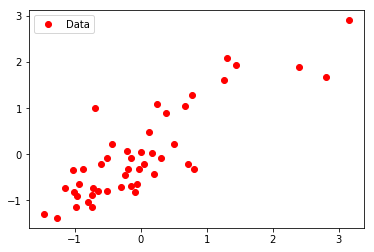

In [32]:
plt.plot(features, labels, 'ro', label='Data')
plt.legend()
plt.show()

Define input placeholders for the input, weights, and bias factors

In [33]:
X = tf.placeholder("float", name="X")
Y = tf.placeholder("float", name="Y")
W = tf.Variable(np.random.randn(), name="weights")
b = tf.Variable(np.random.randn(), name="biases")

Create the linear model

In [34]:
linear_model = tf.add(tf.multiply(X, W), b)

Define the MSE loss

In [35]:
loss = tf.reduce_mean(tf.square(linear_model - Y))

Define the optimizer

In [36]:
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

Define the hyperparameters

In [37]:
epochs = 1000
display = 50

Run the training procedure.

Epoch: 0050 loss= 3.377590656 Weight Value= 0.78478503 Bias Value= -1.7617224
Epoch: 0100 loss= 2.813586712 Weight Value= 0.7914721 Bias Value= -1.5939122
Epoch: 0150 loss= 2.351913691 Weight Value= 0.797522 Bias Value= -1.442087
Epoch: 0200 loss= 1.974003434 Weight Value= 0.8029958 Bias Value= -1.3047237
Epoch: 0250 loss= 1.664658189 Weight Value= 0.80794823 Bias Value= -1.1804445
Epoch: 0300 loss= 1.411439776 Weight Value= 0.8124288 Bias Value= -1.0680039
Epoch: 0350 loss= 1.204162836 Weight Value= 0.8164826 Bias Value= -0.9662733
Epoch: 0400 loss= 1.034492135 Weight Value= 0.8201502 Bias Value= -0.87423235
Epoch: 0450 loss= 0.895605445 Weight Value= 0.82346857 Bias Value= -0.7909588
Epoch: 0500 loss= 0.781917810 Weight Value= 0.8264707 Bias Value= -0.7156175
Epoch: 0550 loss= 0.688856840 Weight Value= 0.8291869 Bias Value= -0.64745265
Epoch: 0600 loss= 0.612680018 Weight Value= 0.83164454 Bias Value= -0.5857806
Epoch: 0650 loss= 0.550324321 Weight Value= 0.8338682 Bias Value= -0.529

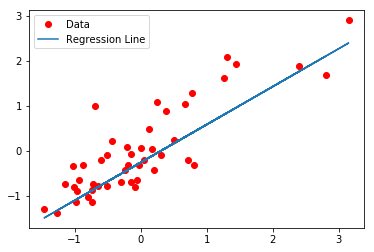

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        sess.run(optimizer, feed_dict={X: features, Y: labels})
        
        if (epoch+1) % display == 0:
            c = sess.run(loss, feed_dict={X: features, Y: labels})
            print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(c), \
                "Weight Value=", sess.run(W), "Bias Value=", sess.run(b))
            
    plt.plot(features, labels, 'ro', label='Data')
    plt.plot(features, sess.run(W) * features + sess.run(b), label='Regression Line')
    plt.legend()
    plt.show()

## V. Building a Feed Forward Network

Start with our imports. MNIST is readily available for use within Tensorflow; it's like the "Hello World" of deep learning. 

In [11]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## Import the MNIST Data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Looking at our MNIST example, we can now set up our overall network parameters:

In [2]:
## Size of the input data
input_layer_size = 784 

## Define the size of the hidden layers; We want them to be smaller than the input
hidden_layer_one = 256
hidden_layer_two = 256 

## Size of the potential output classes
number_classes = 10 

Initialize our weight and bias factors in the TensorFlow graph

In [5]:
## Define the weights and biases as a dictionary
weights = {
 'w1': tf.Variable(tf.random_normal([input_layer_size, hidden_layer_one])),
 'w2': tf.Variable(tf.random_normal([hidden_layer_one, hidden_layer_two])), 
 'w_out': tf.Variable(tf.random_normal([hidden_layer_two, number_classes])) 
}

biases = {
 'b1': tf.Variable(tf.random_normal([hidden_layer_one])), 
 'b2': tf.Variable(tf.random_normal([hidden_layer_two])), 
 'b_out': tf.Variable(tf.random_normal([number_classes])) 
}

Next, create the placeholder variables for our network

In [6]:
## Create the Placeholder Variables
x = tf.placeholder("float", [None, input_layer_size])
y = tf.placeholder("float", [None, number_classes])

Define the training hyperparameters

In [15]:
## Network Parameters
learning_rate = 0.001
epochs = 15
batch_size = 100
display = 1
job_dir = 'mnist_example'

Next, let's actually create our basic, feed forward network.

In [8]:
def feedforward_network(x, weights, biases):
    
    ## First layer; a hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))    

    ## Second layer; a hidden layer with RELU activation function
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']),biases['b2'])) 

    ## Output layer; utilizes a linear activation function
    outputLayer = tf.matmul(layer_2, weights['w_out']) + biases['b_out'] 
    
    ## Return the Last Layer
    return outputLayer

Lastly before training, we'll define our loss and optimizer, and initialize all of the variables

In [16]:
##Construct the model
network_output = feedforward_network(x, weights, biases)

## Define the optimizer and the loss function for the network 
loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=network_output, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_func)

## Checkpoint Saver
save_model = os.path.join(job_dir, 'saved_mnist.ckpt')

Launch the training process by utilizing a Tensorflow session

In [17]:
## Run the Traininng Process Using a Tensorflow Session
with tf.Session() as sess:
    saver = tf.train.Saver()
    
    ## Initialize the variable
    sess.run(tf.global_variables_initializer())

    ## We'll run the training cycle for the amount of epochs that we defined above
    for epoch in range(epochs):
        
        ## Batch the incoming data
        total_batch = int(mnist.train.num_examples/batch_size)  
        
        # Now, loop over all of the batches
        for batch in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            ## Here, we'll run the session by feeding in the optimizer, loss operation, and the batches of data
            _, loss = sess.run([optimizer, loss_func], feed_dict={x: batch_x, y: batch_y})
                              
            ## Print out the loss at each display step
        if epoch % display == 0:
            ## Test the Model's Accuracy
            pred = tf.nn.softmax(network_output)  
            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            
            ## save the weights in a checkpoint
            saver.save(sess, save_model)
                
            print("Epoch:", '%04d' % (epoch+1), "loss={:.9f}".format(loss), \
            "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 loss=27.935014725 Accuracy: 0.8691
Epoch: 0002 loss=30.841621399 Accuracy: 0.9005
Epoch: 0003 loss=25.148893356 Accuracy: 0.9149
Epoch: 0004 loss=5.794556141 Accuracy: 0.9202
Epoch: 0005 loss=10.781435966 Accuracy: 0.926
Epoch: 0006 loss=6.771206856 Accuracy: 0.9327
Epoch: 0007 loss=3.539288044 Accuracy: 0.9327
Epoch: 0008 loss=13.814244270 Accuracy: 0.9349
Epoch: 0009 loss=3.350750446 Accuracy: 0.9355
Epoch: 0010 loss=0.000006614 Accuracy: 0.9401
Epoch: 0011 loss=0.319492191 Accuracy: 0.9366
Epoch: 0012 loss=1.493563175 Accuracy: 0.9419
Epoch: 0013 loss=0.963657975 Accuracy: 0.9403
Epoch: 0014 loss=0.722837269 Accuracy: 0.9431
Epoch: 0015 loss=0.000000000 Accuracy: 0.9429
